In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import yaml

from floris.tools import FlorisInterface
import floris.tools.visualization as wakeviz

[8.60623309 6.64815365 6.19762848]
[8.3296487  6.43359063 5.96399758]


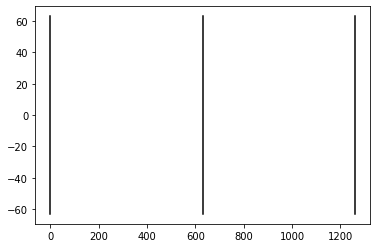

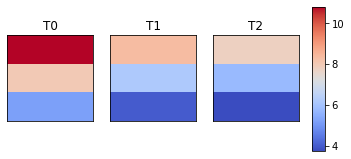

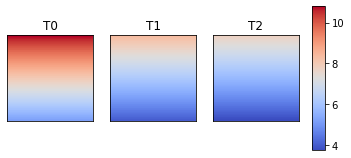

In [2]:
# Instantiate FLORIS with the Jensen model
input_dict = yaml.safe_load( open('inputs/jensen.yaml', 'r') )

# Use a linear wind shear for easier comparison of the numerical integration
input_dict["flow_field"]["wind_shear"] = 1.0


# Set up the wind farm
fi = FlorisInterface(input_dict)
D = 126.0
SPACING = 5.0
layout_x = [
    0,
    D * 1 * SPACING,
    D * 2 * SPACING,
]
layout_y = [
    0,
    0,
    0,
]

fi.reinitialize(
    layout_x=layout_x,
    layout_y=layout_y,
    wind_speeds=[8.0],
)
fi.calculate_wake()

# Plot the layout
wakeviz.plot_turbines_with_fi(fi)

# Compare the wake profile with min and max number of points on rotor plane
solver_dict = copy.deepcopy(input_dict["solver"])
solver_dict["turbine_grid_points"] = 3
fi.reinitialize(solver_settings=solver_dict)
fi.calculate_wake()
wakeviz.plot_rotor_values(
    fi.floris.flow_field.u,
    wd_index=range(0,1),
    ws_index=range(0,1),
    n_rows=1,
    n_cols=3
)
print(fi.turbine_average_velocities[0, 0])

solver_dict["turbine_grid_points"] = 40
fi.reinitialize(solver_settings=solver_dict)
fi.calculate_wake()
wakeviz.plot_rotor_values(
    fi.floris.flow_field.u,
    wd_index=range(0,1),
    ws_index=range(0,1),
    n_rows=1,
    n_cols=3
)
print(fi.turbine_average_velocities[0, 0])

N grid points   Turbine 1 Power (MW)    Farm Power (MW)
            2                  2.338            4.295
            3                  2.129            3.895
            4                  2.056            3.756
            5                  2.022            3.688
            6                  2.002            3.648
            7                  1.989            3.621
            8                  1.979            3.602
            9                  1.972            3.587
           10                  1.966            3.576
           11                  1.962            3.567
           12                  1.958            3.560
           13                  1.955            3.554
           14                  1.952            3.549
           15                  1.950            3.545
           16                  1.948            3.541
           17                  1.946            3.538
           18                  1.945            3.535
           19             

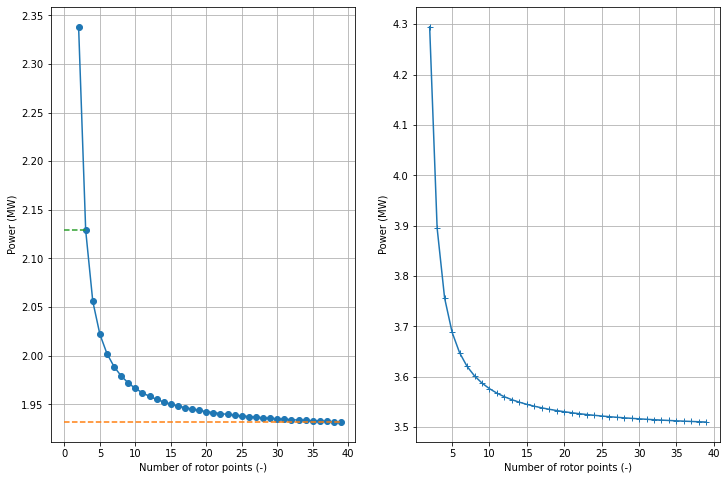

In [3]:
# Show grid dependence for a single unwaked turbine only impacted by the shear profile
rotor_grid_settings = copy.deepcopy(input_dict)
fi = FlorisInterface(rotor_grid_settings)

grid_points_array = range(2, 40)
turbine_power_array = np.zeros((len(grid_points_array), fi.floris.farm.n_turbines))
farm_power_array = np.zeros(len(grid_points_array))
print(f"{'N grid points':13s}   {'Turbine 1 Power (MW)':21s}   {'Farm Power (MW)':15s}")

for i, n_rotor_points in enumerate(grid_points_array):

    # Update number of rotor points
    solver_dict["turbine_grid_points"] = n_rotor_points
    fi.reinitialize(solver_settings=solver_dict)
    fi.calculate_wake()

    # Calculate turbine and farm power
    turbine_power_array[i] = fi.get_turbine_powers()[0, 0] / 1e6
    farm_power_array[i] = fi.get_farm_power()[0, 0] / 1e6
    print(f"{n_rotor_points:13d}   {turbine_power_array[i,0]:20.3f}   {farm_power_array[i]:14.3f}")

fig, axes = plt.subplots(1, 2, figsize=(12,8))
axes[0].plot(grid_points_array, turbine_power_array[:,0], '-o')
axes[0].plot([0, grid_points_array[-1]], 2 * [turbine_power_array[-1,0]], '--')
axes[0].plot([0, grid_points_array[1]], 2 * [turbine_power_array[1,0]], '--')  # This is the typical 3x3 grid
axes[0].grid(True)
axes[0].set_xlabel('Number of rotor points (-)')
axes[0].set_ylabel('Power (MW)')

axes[1].plot(grid_points_array, farm_power_array, '-+')
axes[1].grid(True)
axes[1].set_xlabel('Number of rotor points (-)')
axes[1].set_ylabel('Power (MW)')

max_power = max(farm_power_array)
min_power = min(farm_power_array)
print(f"Max: {max_power:9.3f}")
print(f"Min: {min_power:9.3f}")
print(f"Diff: {100*abs(max_power - min_power) / max_power : 3.1f}%")

In [7]:
# Compare the wake profile with min and max number of points on rotor plane
cubature_grid_settings = copy.deepcopy(input_dict)
cubature_grid_settings["solver"]["type"] = "cubature_grid"
fi = FlorisInterface(cubature_grid_settings)

# fi.calculate_wake()
print(np.shape(fi.floris.grid.x))
print(np.shape(fi.floris.grid.y))
print(np.shape(fi.floris.grid.z))

# cubature_turbine_power = fi.get_turbine_powers()[0, 0] / 1e6
# cubature_farm_power = fi.get_farm_power()[0, 0] / 1e6

# print(f"{'rotor grid':13s}   {turbine_power_array[-1,0]:20.3f}   {farm_power_array[-1]:14.3f}")
# print(f"{'cubature grid':13s}   {cubature_turbine_power[0]:20.3f}   {cubature_farm_power:14.3f}")
# print(f"Diff: {100*abs(cubature_farm_power - min_power) / min_power : 3.1f}%")

[[[[[   0.]
    [   0.]
    [   0.]
    [   0.]
    [   0.]
    [   0.]
    [   0.]
    [   0.]
    [   0.]]

   [[ 630.]
    [ 630.]
    [ 630.]
    [ 630.]
    [ 630.]
    [ 630.]
    [ 630.]
    [ 630.]
    [ 630.]]

   [[1260.]
    [1260.]
    [1260.]
    [1260.]
    [1260.]
    [1260.]
    [1260.]
    [1260.]
    [1260.]]]]]
[[[[[-25.7196423]
    [-51.4392846]
    [-25.7196423]
    [  0.       ]
    [  0.       ]
    [  0.       ]
    [ 25.7196423]
    [ 51.4392846]
    [ 25.7196423]]

   [[-25.7196423]
    [-51.4392846]
    [-25.7196423]
    [  0.       ]
    [  0.       ]
    [  0.       ]
    [ 25.7196423]
    [ 51.4392846]
    [ 25.7196423]]

   [[-25.7196423]
    [-51.4392846]
    [-25.7196423]
    [  0.       ]
    [  0.       ]
    [  0.       ]
    [ 25.7196423]
    [ 51.4392846]
    [ 25.7196423]]]]]
[[[[[134.54772721]
    [ 90.        ]
    [ 45.45227279]
    [ 90.        ]
    [ 90.        ]
    [ 90.        ]
    [ 45.45227279]
    [ 90.        ]
    [134.54772721]]

 